<a href="https://colab.research.google.com/github/antoniogonzalezai/malaria-detection-CNN/blob/main/NeuraSys_AI_Malaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

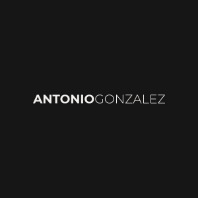


#**Malaria Datasets.**



Abstract:

This page hosts a repository of segmented cells from the thin blood smear slide images from the Malaria Screener research activity. To reduce the burden for microscopists in resource-constrained regions and improve diagnostic accuracy, researchers at the Lister Hill National Center for Biomedical Communications (LHNCBC), part of National Library of Medicine (NLM), have developed a mobile application that runs on a standard Android smartphone attached to a conventional light microscope. Giemsa-stained thin blood smear slides from 150 P. falciparum-infected and 50 healthy patients were collected and photographed at Chittagong Medical College Hospital, Bangladesh. The smartphone’s built-in camera acquired images of slides for each microscopic field of view.

**Download Dataset from google storage**

Run the cell in order and follow steps



In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
!curl https://sdk.cloud.google.com | bash

In [ ]:
!gsutil cp gs://neurasys-datasets/Malaria/Malaria_AI_Antonio_Gonzalez.h5 .

In [ ]:
!gsutil cp gs://neurasys-datasets/Malaria/Malaria_dataset.npz .

**Import libraries**

In [4]:
import tensorflow as tf
import keras
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
from numpy import *
data = np.load('/content/Malaria_dataset.npz')
print(data.files)

**Extrac Arrays From Dataset**

In [ ]:
x_train = data["x_train"]
x_test = data["x_test"]
y_train = data["y_train"]
y_test = data["y_test"]

*The data was processed where each image have shape 150x150 in grayscale. After that, it was reshape and divided into 255.0 so that it can be processed by CNN (Convolutional Neural Network).*

**About Dataset**

The images were manually annotated by an expert slide reader at the Mahidol-Oxford Tropical Medicine Research Unit in Bangkok, Thailand. The de-identified images and annotations are archived at NLM (IRB#12972). We applied a level-set based algorithm to detect and segment the red blood cells. The dataset contains a total of 27,558 cell images with equal instances of parasitized and uninfected cells

**Labels**

0.   Label 0 = Parasitized
1.   Label 1 = Uninfected

In [ ]:
class_names = ['Parasitized','Uninfected']

**View Images**

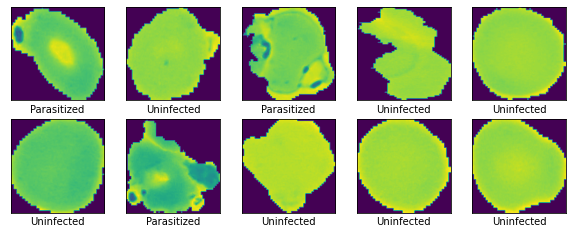

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(class_names[np.argmax(y_test[i])])
plt.show()

**Load Trained CNN (Convolutional Neural Network)**

In [5]:
path_model = '/content/Malaria_AI_Antonio_Gonzalez.h5'
model = load_model(path_model)

**Evaluate model**

In [ ]:
val_loss , val_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", val_loss)
print("Test accuracy:",val_acc)

**Validations during training**

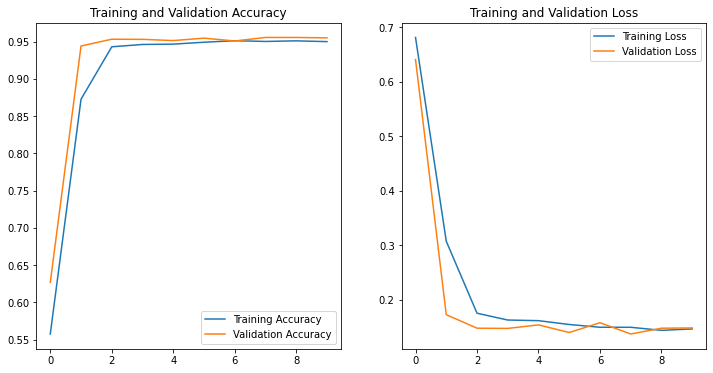

In [ ]:
test_labels = np.argmax(y_test, axis=-1)

predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)


cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(2),['Parasitized','Uninfected'], fontsize=8)
plt.yticks(range(2),['Parasitized','Uninfected'], fontsize=8)
plt.show()

## **Model Predictions**

Type a number in range 0 to 5512, and add the number to variable X .This number will be the image to predict

In [ ]:
img_size = 150

X = 4000

img_single = x_test[X]
img_single = cv2.resize(img_single, (img_size, img_size))
img_single = (np.expand_dims(img_single, 0))
img_single = img_single.reshape(img_single.shape[0],150,150,1)

predictions_single = model.predict(img_single)


print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(predictions_single)], 100 * np.max(predictions_single))
)
plt.imshow(np.squeeze(img_single))
plt.show()

The data appear along with the publication: Rajaraman S, Antani SK, Poostchi M, Silamut K, Hossain MA, Maude, RJ, Jaeger S, Thoma GR. (2018) Pre-trained convolutional neural networks as feature extractors toward improved Malaria parasite detection in thin blood smear images. PeerJ6:e4568 https://doi.org/10.7717/peerj.4568 



An improvement in performance has been recently reported using deep neural ensembles toward malaria parasite detection in thin-blood smear images and is published in the PeerJ journal as cited herewith: Rajaraman S, Jaeger S, Antani SK. (2019) Performance evaluation of deep neural ensembles toward malaria parasite detection in thin-blood smear images. PeerJ 7:e6977 https://doi.org/10.7717/peerj.6977 

